# ACM Research 2023 Spring

## Setup

The setup for this notebook includes the downloading of pandas, matplotlib, numpy, seaborn.  Three Tuples are made that will make graphing the data easier.

In [121]:
#set up Tuples and Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#constants for the HR graphs 
ALPHA = .8
DOT_SIZE = 10


specClassTuple = (
    'O',
    'B',
    'A',
    'F',
    'G',
    'K',
    'M',
)

starKeyTuple = (
    'Brown Dwarf',
    'Red Dwarf', 
    'White Dwarf', 
    'Main Sequence', 
    'Super Giant', 
    'Hypergiant',
)

starColorTuple = (
    'Red',
    'Blue',
    'Blue-White',
    'White',
    'Yellow-White',
    'Yellowish-White',
    'Yellowish',
    'Whitish',
    'Orange',
    'Pale-Yellow-Orange',
    'White-Yellow',
    'Orange-Red',
)

df = pd.read_csv(r'data.csv')

## Correlation Matrix

From this matrix we can tell... 

C:\Users\Nathan Perez\AppData\Local\Temp\ipykernel_16512\2133408365.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrDf = df.corr()


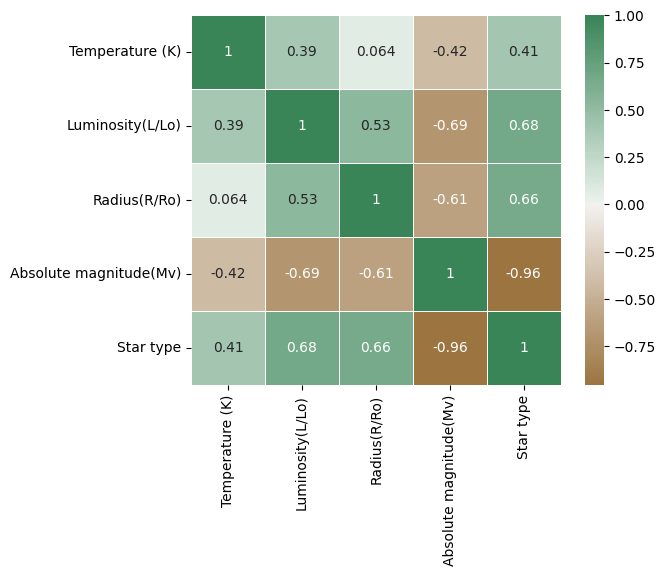

In [122]:
#make a correlation matrix 

#TODO: use the normal and corrected star color list to make a matrix.  Make the stars 0 to X from least hot to most hot
#makes a correlation Matrix
corrDf = df.corr()

axis_corr = sns.heatmap(
corrDf,
center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True,
annot=True,
linewidths=.5,
)

plt.show()
 

##  Star Type

The following shows the most common star type in the data set. From this data it can be said that all occur the same number of times.

Star type, Times occured in data
Brown Dwarf , 40
Red Dwarf , 40
White Dwarf , 40
Main Sequence , 40
Super Giant , 40
Hypergiant , 40


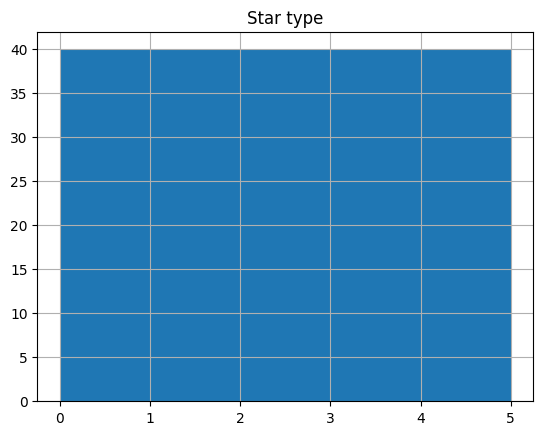

In [123]:
#Finds the most common star types and outputs text and a graph

#print histogram
df.hist(column="Star type", bins=6)

#print the number of times each occur
print("Star type, Times occured in data")
counter = 0
for i, val in enumerate(starKeyTuple):
    print(val,',',df['Star type'].value_counts()[i])
    counter += df['Star type'].value_counts()[i]

## Temputure, Luminsoity, Radius (R/Ro)

The following graphs the y-axis is the frequency while the x-axis is the Temputure, Luminsoity, Radius

array([[<AxesSubplot: title={'center': 'Radius(R/Ro)'}>]], dtype=object)

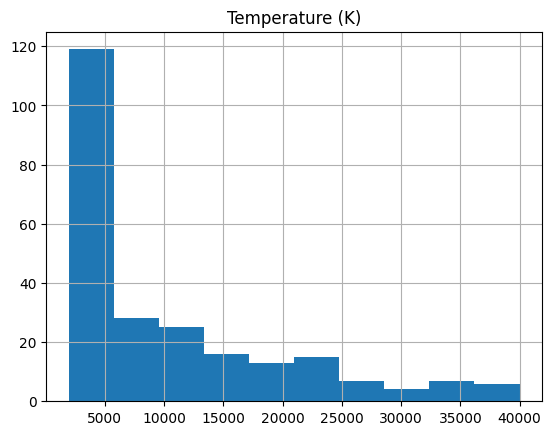

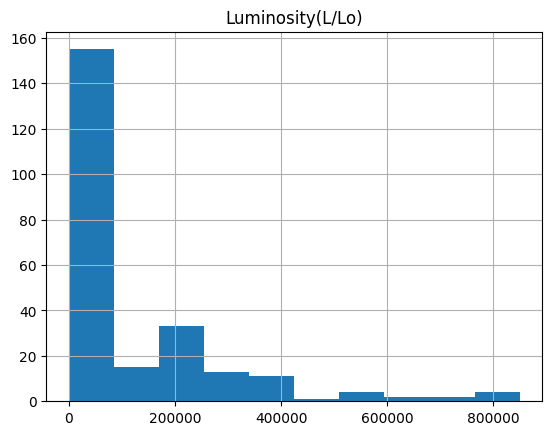

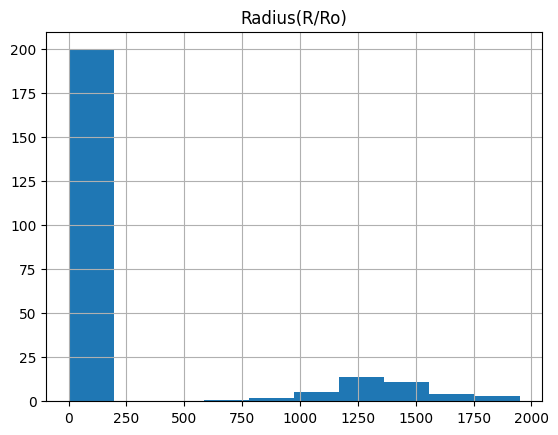

In [124]:
df.hist(column="Temperature (K)")
df.hist(column="Luminosity(L/Lo)")
df.hist(column="Radius(R/Ro)")

## Pi Chart of Spectral Class and Star Color

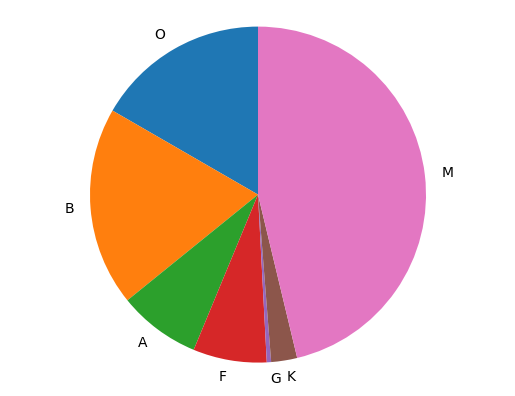

In [125]:
#makes a pi chart of spectral class and star color

numOfSpecClass = []
for i, val in enumerate(specClassTuple):
    numOfSpecClass.append(df['Spectral Class'].value_counts()[val])
fig1, ax1 = plt.subplots()
ax1.pie(numOfSpecClass, labels=specClassTuple,startangle=90)
ax1.axis('equal')  
plt.show()

## HR diagrams

### Graphs by Spectral Class, Star Type, and Star Color Based on existing data set

The following diagrams are graphed by Sectral Class and by Star Type. Star color...

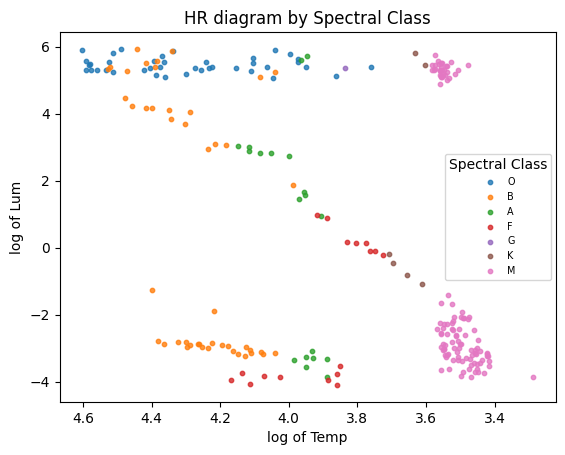

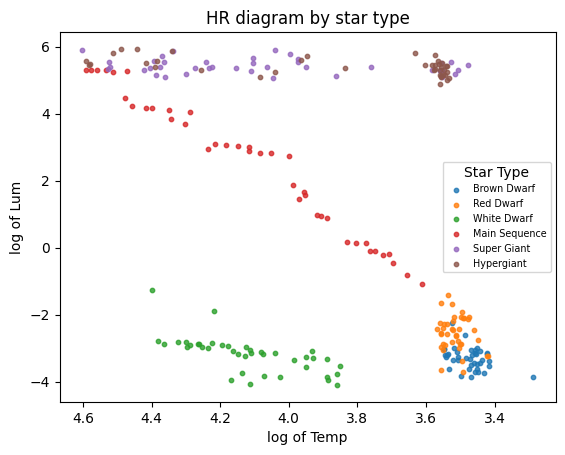

In [126]:
#graphs hertzsprung Russell diagrams

#plot all stars by spec class  (with color)
for e,val in enumerate(specClassTuple):
    tmpDf = df.loc[df['Spectral Class'].values == val]                                                     
    plt.scatter(x=np.log10(tmpDf['Temperature (K)']), y=np.log10(tmpDf['Luminosity(L/Lo)']),s=DOT_SIZE,alpha=ALPHA, label=f"{val}")    
plt.gca().invert_xaxis()
plt.title("HR diagram by Spectral Class")
plt.ylabel("log of Lum")
plt.xlabel("log of Temp")
plt.legend(title="Spectral Class", fontsize="x-small")
plt.show()


#plot all stars by startype (with color)
for e, val in enumerate(starKeyTuple):
    tmpDf = df.loc[df['Star type'].values == e]                                                     
    plt.scatter(x=np.log10(tmpDf['Temperature (K)']), y=np.log10(tmpDf['Luminosity(L/Lo)']),s=DOT_SIZE,alpha=ALPHA, label=f"{val}")     
plt.gca().invert_xaxis()
plt.title("HR diagram by star type")
plt.ylabel("log of Lum")
plt.xlabel("log of Temp")
plt.legend(title="Star Type", fontsize="x-small")
plt.show()

#TODO: do by star color



### Results of The graphs

From these diagrams we can see that the Spectral Class of the star is closly related to the log of the temputure of the star.  This makies sense as the Morgan--Keenan system works by using the temputure of the a star to classify them.  We can also see clumping of different 'zones'

Star color... [these test should have weird results where there are a lot a colors that overlap].  These tests should be re run to include some star colors like "yellow-white" and "Yellowish White" and "white-Yellow" can be combined.  Simular combinations exist for other star colors

## Proposed Color Changes

All colors will be changed in the upcoming code snippet based on the colors found here https://starparty.com/topics/astronomy/stars/the-morgan-keenan-system/ .  This is done to more clearly see the colors. of the stars.  

The new colors are now the following. 
- O – greater than 30,000 Kelvin – colour description: blue
- B – 10,000 to 30,000 Kelvin – colour description: blue white
- A – 7,500 to 10,000 Kelvin – colour description: white
- F – 6,000 to 7,500 Kelvin – colour description: yellow white
- G – 5,200 to 6,000 Kelvin – colour description: yellow
- K – 3,700 to 5,200 Kelvin – colour description: orange
- M – 2,400 to 3,700 Kelvin – colour description: red

In [127]:
#Create a dataframe of just the mistakes.  output results into mistakeDf

#dataframe with a flag
df["MistakeFlag"] = np.nan
mistakeDf = pd.DataFrame()

#find any mistakes
for i, val in enumerate(df["Spectral Class"]):
    match val:
        case "O":
            if not (df['Temperature (K)'][i] >= 30000):
                df.at[i,'MistakeFlag'] = 1
        case "B":
            if not (10000<=df['Temperature (K)'][i]<=30000):
                df.at[i,'MistakeFlag'] = 1
        case "A":
            if not (7500<=df['Temperature (K)'][i]<=10000):
                df.at[i,'MistakeFlag'] = 1
        case "F":
            if not (6000<=df['Temperature (K)'][i]<=7500):
                df.at[i,'MistakeFlag'] = 1
        case "G":
            if not (5200<=df['Temperature (K)'][i]<=6000):
                df.at[i,'MistakeFlag'] = 1  
        case "K":
            if not (3700<=df['Temperature (K)'][i]<=5200):
                df.at[i,'MistakeFlag'] = 1  
        case "M":
            if not (2400<=df['Temperature (K)'][i]<=3700):
                df.at[i,'MistakeFlag'] = 1 
        case _:
            print("out of bounds")

mistakeDf = df.loc[df['MistakeFlag'] == 1]
mistakeDf.drop(columns='MistakeFlag')

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
4,1939,0.000138,0.10300,20.060,0,Red,M
25,12990,0.000085,0.00984,12.230,2,Yellowish White,F
27,7700,0.000110,0.01280,14.470,2,Yellowish White,F
28,11790,0.000150,0.01100,12.590,2,Yellowish White,F
33,9700,74.000000,2.89000,0.160,3,Whitish,B
34,5800,0.810000,0.90000,5.050,3,yellow-white,F
38,5936,1.357000,1.10600,4.460,3,yellow-white,F
39,5587,0.819000,0.99000,5.030,3,yellow-white,F
40,3826,200000.000000,19.00000,-6.930,4,Red,M
49,33750,220000.000000,26.00000,-6.100,4,Blue,B


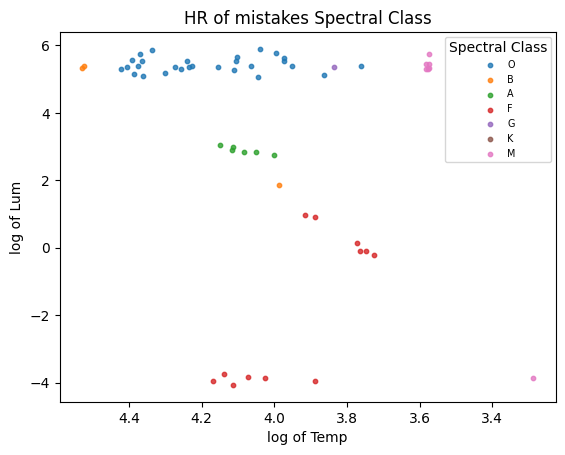

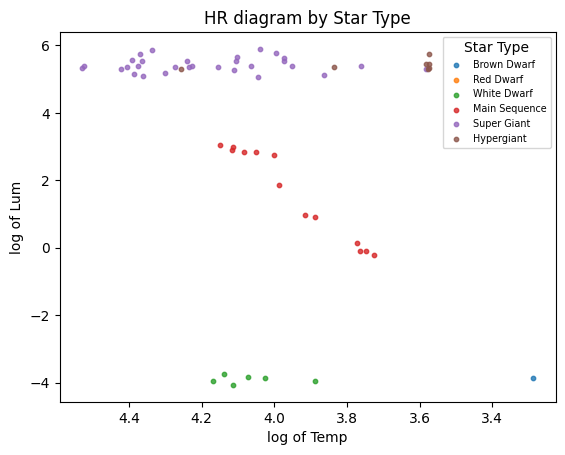

In [128]:
#graph HR of mistakeDf

#graph the results
for i, val in enumerate(specClassTuple):
    tmpDf = mistakeDf.loc[mistakeDf['Spectral Class'].values == val]                                                     
    plt.scatter(x=np.log10(tmpDf['Temperature (K)']), y=np.log10(tmpDf['Luminosity(L/Lo)']),s=DOT_SIZE,alpha=ALPHA,label=f"{val}")  
plt.gca().invert_xaxis()
plt.title(f"HR of mistakes Spectral Class")
plt.ylabel("log of Lum")
plt.xlabel("log of Temp")
plt.legend(title="Spectral Class", fontsize="x-small")
plt.show()

#plot all stars by startype (with color)
for e, val in enumerate(starKeyTuple):
    tmpDf = mistakeDf.loc[mistakeDf['Star type'].values == e]                                                     
    plt.scatter(x=np.log10(tmpDf['Temperature (K)']), y=np.log10(tmpDf['Luminosity(L/Lo)']),s=DOT_SIZE,alpha=ALPHA, label=f"{val}")     
plt.gca().invert_xaxis()
plt.title("HR diagram by Star Type")
plt.ylabel("log of Lum")
plt.xlabel("log of Temp")
plt.legend(title="Star Type", fontsize="x-small")
plt.show()


### Results of the Graphs

Although this is intresting, There is not enough infomation given to be sure why this is occuring.  The data shows that the errors are not distributed along the whole data set, but instead showing clumping in the areas that are mainly Main Sequence Stars, Super Giants, and white dwarfs.

Doing the graph this away allows for a much cleaner expression of the stars colors, and the viewier can easily see that blue stars are the hottest stars, while red are coldest.  The viewer can also see that stars of simular temps can have different lum's.  Intrestingly a star is present that is outside of this data range, having a temp of 1939, and a listed type of M.

## Closing Remarks